In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dir = '/mnt/data/2020_Projects/2021_HDP/03_Data/FBCcalc_simbio_fastfield_20subj/'
#dir = '/home/brainstimmaps/RESEARCH/20xx_Projects/2021_HDP/perm_test/'

In [15]:
newdata = 'newdata10/'
best_level_clinical_model_HDP = pd.read_csv(dir + newdata + 'best_level_clinical_model_HDP.csv')
best_level_clinical_model_CST = pd.read_csv(dir + newdata + 'best_level_clinical_model_CST.csv')
best_level_clinical_model_2 = pd.read_csv(dir + newdata + 'best_level_clinical_model_2.csv')
best_level_clinical_model_win = pd.read_csv(dir + newdata + 'best_level_clinical_model_window.csv')

best_contact_clinical_model_HDP = pd.read_csv(dir + newdata + 'best_contact_clinical_model_HDP.csv')
best_contact_clinical_model_CST = pd.read_csv(dir + newdata + 'best_contact_clinical_model_CST.csv')
best_contact_clinical_model_2 = pd.read_csv(dir + newdata + 'best_contact_clinical_model_2.csv')
best_contact_clinical_model_win = pd.read_csv(dir + newdata + 'best_contact_clinical_model_window.csv')

In [4]:
best_contact_clinical_model_HDP.groupby(best_contact_clinical_model_HDP['compare']).count()

LeadID  ContactID   mA  best_clin  mA_model  best_model
compare                                                         
False        87         87   87         87        87          87
True        116        116  116        116       116         116

In [5]:
116/203

0.5714285714285714

In [6]:
best_contact_clinical_model_HDP.loc[best_contact_clinical_model_HDP['best_clin'] == 1].groupby(best_contact_clinical_model_HDP['compare']).count()

LeadID  ContactID  mA  best_clin  mA_model  best_model  compare
compare                                                                 
False        28         28  28         28        28          28       28
True         16         16  16         16        16          16       16

In [7]:
best_contact_clinical_model_HDP.loc[(best_contact_clinical_model_HDP['best_clin'] == 1 ) & (best_contact_clinical_model_HDP['best_model'] == 1)].best_clin.sum()

16

In [8]:
def custom_perm(x, y, k, n_perm=100000):

    N = len(x)
    x_rand = np.array([1] * k + [0] * (N-k))
    np.random.shuffle(x_rand)

    n_permutations = n_perm
    permute_stat = []

    for p in range(n_permutations):
        x_permuted = np.random.permutation(x_rand)
        df = pd.DataFrame({'x':x_permuted, 'y':y})
        match = df.loc[(df['x'] == 1 ) & (df['y'] == 1)].y.sum()
        permute_stat.append(match)


    df_model = pd.DataFrame({'x':x, 'y':y})
    model_stat = df_model.loc[(df_model['x'] == 1 ) & (df_model['y'] == 1)].y.sum()

    p_value = 1 - np.sum(permute_stat < model_stat)/len(permute_stat)
    #p_value = np.sum(permute_mse < model_mse)/len(permute_mse)

    sns.histplot(permute_stat, kde=True, label='Population')
    plt.title('Sample Distribution', fontsize=18)
    plt.ylabel('Frequency', fontsize=16)

    plt.axvline(x=model_stat, ymin=0, ymax=1, color='red', linestyle='--')

    print(f'Model stat: {model_stat}')
    print(f'n permutations < Model stat = {np.sum(permute_stat < model_stat)}')
    print(f'p-value = {p_value:.3}')

Model stat: 30
n permutations < Model stat = 100000
p-value = 0.0


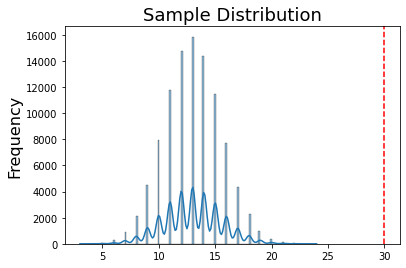

In [9]:
# Best level HDP
x = best_level_clinical_model_HDP.best_model.to_numpy()
y = best_level_clinical_model_HDP.best_clin.to_numpy()
k = best_level_clinical_model_HDP.LeadID.nunique()

custom_perm(x, y, k)

Model stat: 16
n permutations < Model stat = 99909
p-value = 0.00091


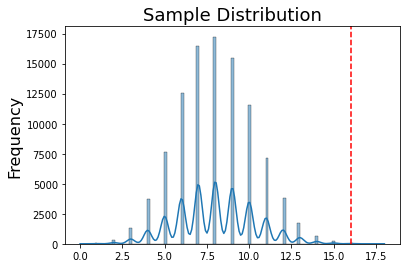

In [10]:
# Best contact HDP
x = best_contact_clinical_model_HDP.best_model.to_numpy()
y = best_contact_clinical_model_HDP.best_clin.to_numpy()
k = best_contact_clinical_model_HDP.LeadID.nunique()

custom_perm(x, y, k)

Model stat: 33
n permutations < Model stat = 100000
p-value = 0.0


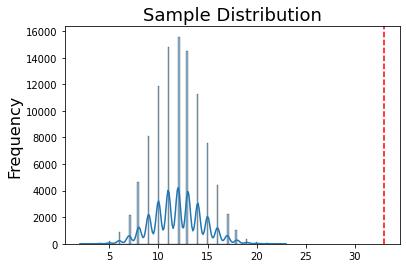

In [11]:
# Best level CST
x = best_level_clinical_model_CST.best_model.to_numpy()
y = best_level_clinical_model_CST.best_clin.to_numpy()
k = best_level_clinical_model_CST.LeadID.nunique()

custom_perm(x, y, k)

In [12]:
# Best contact CST
x = best_contact_clinical_model_CST.best_model.to_numpy()
y = best_contact_clinical_model_CST.best_clin.to_numpy()
k = best_contact_clinical_model_CST.LeadID.nunique()

custom_perm(x, y, k)

Model stat: 36
n permutations < Model stat = 100000
p-value = 0.0


In [13]:
# Best level 2
x = best_level_clinical_model_2.best_model.to_numpy()
y = best_level_clinical_model_2.best_clin.to_numpy()
k = best_level_clinical_model_2.LeadID.nunique()

custom_perm(x, y, k)

Model stat: 28
n permutations < Model stat = 100000
p-value = 0.0


Model stat: 14
n permutations < Model stat = 98997
p-value = 0.01


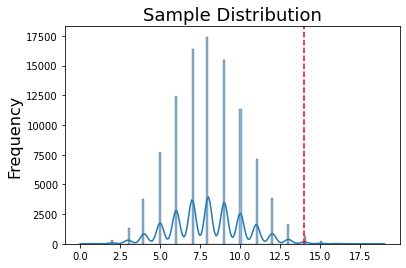

In [14]:
# Best contact 2
x = best_contact_clinical_model_2.best_model.to_numpy()
y = best_contact_clinical_model_2.best_clin.to_numpy()
k = best_contact_clinical_model_2.LeadID.nunique()

custom_perm(x, y, k)

Model stat: 21
n permutations < Model stat = 99998
p-value = 2e-05


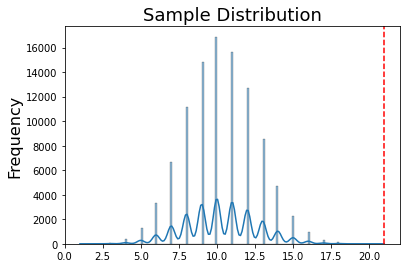

In [16]:
# Best level window
x = best_level_clinical_model_win.best_model.to_numpy()
y = best_level_clinical_model_win.best_clin.to_numpy()
k = best_level_clinical_model_win.LeadID.nunique()

custom_perm(x, y, k)

In [17]:
# Best contact window
x = best_contact_clinical_model_win.best_model.to_numpy()
y = best_contact_clinical_model_win.best_clin.to_numpy()
k = best_contact_clinical_model_win.LeadID.nunique()

custom_perm(x, y, k)

Model stat: 11
n permutations < Model stat = 82318
p-value = 0.177
